In [1]:
from os.path import join, abspath
from os import getcwd

import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
data_dir = abspath(join(getcwd(), '../../'))

In [3]:
# load covariance analysis
with open(data_dir + '/models/results/covariance_analysis/sensilla_covariance.pickle', 'rb') as file:
    results = pickle.load(file)
cov_mat = results['covariance']
evecs = results['evecs']
evals = results['evals']

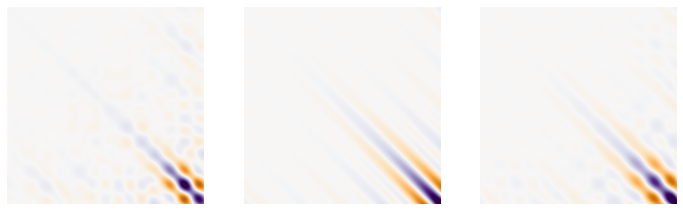

In [4]:
# plot the covariance matrices
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(cov_mat['data'], cmap='PuOr') # PiYG_r
plt.clim(-5, 5)
plt.axis('off')

ax = fig.add_subplot(1, 3, 2)
plt.imshow(cov_mat['model'], cmap='PuOr')
plt.clim(-5, 5)
plt.axis('off')

ax = fig.add_subplot(1, 3, 3)
plot = plt.imshow(cov_mat['finite'], cmap='PuOr')
plt.clim(-5, 5)
plt.axis('off')
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_3/covmat_sensilla.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0)

# save the colorbar separately
fig, ax = plt.subplots(figsize=(8, 4))
cbar = plt.colorbar(plot, ax=ax)
cbar.set_ticks([])
ax.remove()
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_3/covmat_colorbar.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

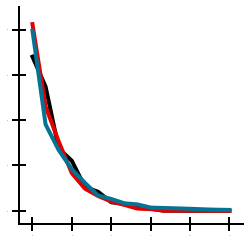

In [23]:
# plot the eigenvalues
evals['data'] /= np.sum(evals['data'])
evals['model'] /= np.sum(evals['model'])
evals['finite'] /= np.sum(evals['finite'])


t = 16
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.plot(np.flip(evals['model'])[:t], '-', lw=4, c='#000000', alpha=1)
plt.plot(np.flip(evals['finite'])[:t], '-', lw=4, c='#e50000', alpha=1)
plt.plot(np.flip(evals['data'])[:t], '-', lw=4, c='#047495', alpha=1)
# plt.ylabel('Variance')
# plt.xlabel('PC dimension')

# format ticks
ax.tick_params(axis = 'both', which = 'major', direction='inout', labelsize = 0, width=2, length=14)
plt.xlim(-1, 16)
plt.ylim(-0.03, 0.45)
plt.yticks(np.arange(0, 0.5, 0.1))
plt.xticks(np.arange(0, 16, 3))

# format axes
for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(2)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)

plt.savefig(data_dir + '/reports/figures/paper_figs/figure_3/evals_sensilla.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0)

Explained variance 0.87


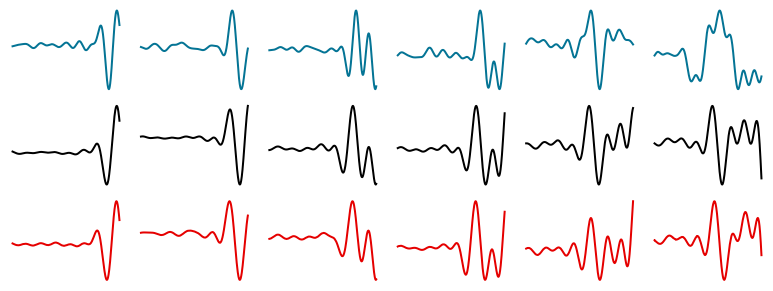

In [61]:
# plot eigenvecs
p = [-1, 1, -1, -1, 1, 1] # multiplicative factor to flip signs
fig = plt.figure(figsize=(10.85, 5))
for i in range(6):
    ax = fig.add_subplot(3, 6, i+1)
#     ax.set_title(i)
    plt.plot(evecs['data'][:, -i - 1] , lw=2, c='#047495')
    plt.axis('off')
    
    ax = fig.add_subplot(3, 6, 6 + i +1)
    plt.plot(evecs['model'][:, -i - 1] * p[i], lw=2, c='#000000')
    plt.axis('off')
    
    ax = fig.add_subplot(3, 6, 12 + i +1)
    plt.plot(evecs['finite'][:, -i - 1] * p[i], lw=2, c='#e50000')
    plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig(data_dir + '/reports/figures/paper_figs/figure_3/evecs_sensilla.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0)

print('Explained variance {:0.2f}'.format(np.sum(evals['data'][-5:])))

In [49]:
2.17 * 5

10.85